# Plot x, y data from a databroker run

This Bluesky notebook only uses the `databroker` package (and `matplotlib`) to plot $(x,y)$ data from a previous measurement.

## 1. Show what data catalogs are available

In [1]:
import databroker
list(databroker.catalog)

['bdp2022',
 'class_2021_03',
 '6idb_export',
 'apstools_test',
 'class_data_examples',
 'usaxs_test',
 'korts202106',
 'training']

## 2. Choose a specific run from a catalog

Here, the `class_data_examples` catalog will be used.  The run with `scan_id=86` has a scan of detector vs. motor.

In [2]:
cat = databroker.catalog["class_data_examples"]
run = cat[86]
run

BlueskyRun
  uid='d19530f7-1ca6-4c02-a83b-229b3d92b6d1'
  exit_status='success'
  2021-03-06 14:10:46.462 -- 2021-03-06 14:10:49.317
  Streams:
    * baseline
    * primary


## 3. Show the (primary) data

Get all the data available from the `primary` stream.  The `primary` stream is where bluesky stores the data acquired from a scan.  `databroker` returns this data as an [xarray Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html).  

The detector is named `noisy` and the motor is named `m1`.  We'll refer to `m1` and `noisy` as _data variables_ to be consistent with the `xarray.Dataset` (as shown in the table below).

In [3]:
dataset = run.primary.read()
dataset

<xarray.Dataset>
Dimensions:           (time: 23)
Coordinates:
  * time              (time) float64 1.615e+09 1.615e+09 ... 1.615e+09 1.615e+09
Data variables:
    m1                (time) float64 0.939 0.941 0.942 ... 0.968 0.969 0.971
    m1_user_setpoint  (time) float64 0.9392 0.9407 0.9421 ... 0.9693 0.9708
    noisy             (time) float64 8.589e+03 1.067e+04 ... 1.076e+04 8.774e+03

## 4. Get data for the $x$ and $y$ axes

The plotting steps become easier (and more general) if we create objects for each specific data variable to be plotted.

Pick the `m1` (motor readback value) and `noisy` data for $x$ and $y$, respectively.

In [4]:
x = dataset["m1"]
y = dataset["noisy"]

## 5. Use MatPlotLib

In [5]:
import matplotlib.pyplot as plt

## 6. Plot $(x,y)$ using matplotlib

Follow the MatPlotLib [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) to learn how to customize this plot.  The data (`x.values` and `y.values`) are obtained as [numpy ndarrays](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

Text(0.5, 1.0, 'scan_id=86')

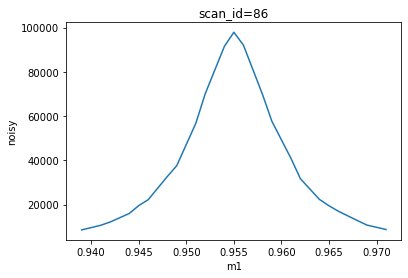

In [6]:
plt.plot(x.values, y.values)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title(f"scan_id={run.metadata['start']['scan_id']}")

## 7. Plotting function

Summarizing the code above, here is a handy function you can use to plot such $(x, y)$ data.  Or, you can use this code as a starting point to make your own plot function.

In [7]:

def xyplot(dataset, xname, yname, title=None):
    """
    Plot the data from the primary stream (above).

    Example::

        xyplot(cat[-1].primary.read(), x.name, y.name)
    """
    import matplotlib.pyplot as plt

    x = dataset[xname]
    y = dataset[yname]
    title = title or f"{yname} v. {xname}"

    plt.plot(x.values, y.values)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)

Here is an example using this function with the `dataset` from above.  The actual name for each data variable must match the name provided by the `dataset`.  A plot title is provided.

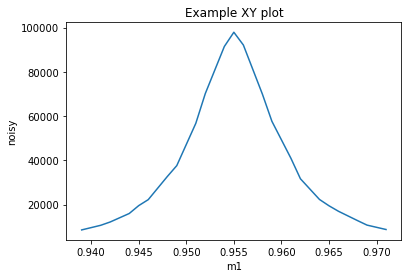

In [8]:
xyplot(dataset, "m1", "noisy", title="Example XY plot")